In [3]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
import tensorflow as tf
import sklearn.metrics

In [4]:
train_df = pd.read_csv("/content/train_FD001.csv")
test_df = pd.read_csv("/content/test_FD001.csv")

train_df.describe()

,engine,cycle,setting_1,setting_2,setting_3,Sensor_1,Sensor_2,Sensor_3,Sensor_4,Sensor_5,...,Sensor_12,Sensor_13,Sensor_14,Sensor_15,Sensor_16,Sensor_17,Sensor_18,Sensor_19,Sensor_20,Sensor_21
count,20631.000000,20631.000000,20631.000000,20631.000000,20631.0,20631.00,20631.000000,20631.000000,20631.000000,2.063100e+04,...,20631.000000,20631.000000,20631.000000,20631.000000,2.063100e+04,20631.000000,20631.0,20631.0,20631.000000,20631.000000
mean,51.506568,108.807862,-0.000009,0.000002,100.0,518.67,642.680934,1590.523119,1408.933782,1.462000e+01,...,521.413470,2388.096152,8143.752722,8.442146,3.000000e-02,393.210654,2388.0,100.0,38.816271,23.289705
std,29.227633,68.880990,0.002187,0.000293,0.0,0.00,0.500053,6.131150,9.000605,1.776400e-15,...,0.737553,0.071919,19.076176,0.037505,1.387812e-17,1.548763,0.0,0.0,0.180746,0.108251
min,1.000000,1.000000,-0.008700,-0.000600,100.0,518.67,641.210000,1571.040000,1382.250000,1.462000e+01,...,518.690000,2387.880000,8099.940000,8.324900,3.000000e-02,388.000000,2388.0,100.0,38.140000,22.894200
25%,26.000000,52.000000,-0.001500,-0.000200,100.0,518.67,642.325000,1586.260000,1402.360000,1.462000e+01,...,520.960000,2388.040000,8133.245000,8.414900,3.000000e-02,392.000000,2388.0,100.0,38.700000,23.221800
50%,52.000000,104.000000,0.000000,0.000000,100.0,518.67,642.640000,1590.100000,1408.040000,1.462000e+01,...,521.480000,2388.090000,8140.540000,8.438900,3.000000e-02,393.000000,2388.0,100.0,38.830000,23.297900
75%,77.000000,156.000000,0.001500,0.000300,100.0,518.67,643.000000,1594.380000,1414.555000,1.462000e+01,...,521.950000,2388.140000,8148.310000,8.465600,3.000000e-02,394.000000,2388.0,100.0,38.950000,23.366800
max,100.000000,362.000000,0.008700,0.000600,100.0,518.67,644.530000,1616.910000,1441.490000,1.462000e+01,...,523.380000,2388.560000,8293.720000,8.584800,3.000000e-02,400.000000,2388.0,100.0,39.430000,23.618400


In [47]:
test_df.describe()

,engine,cycle,setting_1,setting_2,Sensor_2,Sensor_3,Sensor_4,Sensor_6,Sensor_7,Sensor_8,Sensor_9,Sensor_11,Sensor_12,Sensor_13,Sensor_14,Sensor_15,Sensor_17,Sensor_20,Sensor_21
count,13096.000000,13096.000000,13096.000000,13096.000000,13096.000000,13096.000000,13096.000000,13096.000000,13096.000000,13096.000000,13096.000000,13096.000000,13096.000000,13096.000000,13096.000000,13096.000000,13096.000000,13096.000000,13096.000000
mean,51.543907,76.836515,-0.000011,0.000004,642.475088,1588.099204,1404.735362,21.609701,553.757523,2388.070964,9058.407363,47.416204,521.747724,2388.071025,8138.947817,8.425844,392.571625,38.892502,23.335743
std,28.289423,53.057749,0.002203,0.000294,0.400899,5.003274,6.688309,0.001704,0.681286,0.057442,11.436261,0.195917,0.559627,0.056934,10.188605,0.029009,1.233577,0.141681,0.084120
min,1.000000,1.000000,-0.008200,-0.000600,641.130000,1569.040000,1384.390000,21.600000,550.880000,2387.890000,9024.530000,46.800000,519.380000,2387.890000,8108.500000,8.332800,389.000000,38.310000,22.935400
25%,28.000000,33.000000,-0.001500,-0.000200,642.197500,1584.600000,1399.950000,21.610000,553.310000,2388.030000,9051.020000,47.270000,521.380000,2388.030000,8132.310000,8.405600,392.000000,38.800000,23.281600
50%,52.000000,69.000000,-0.000000,-0.000000,642.460000,1587.990000,1404.440000,21.610000,553.800000,2388.070000,9057.320000,47.410000,521.780000,2388.070000,8138.390000,8.424900,393.000000,38.900000,23.339200
75%,76.000000,113.000000,0.001500,0.000300,642.740000,1591.362500,1409.050000,21.610000,554.240000,2388.110000,9064.110000,47.540000,522.150000,2388.110000,8144.360000,8.444300,393.000000,38.990000,23.393600
max,100.000000,303.000000,0.007800,0.000700,644.300000,1607.550000,1433.360000,21.610000,555.840000,2388.300000,9155.030000,48.260000,523.760000,2388.320000,8220.480000,8.541400,397.000000,39.410000,23.641900


In [5]:
train_df

,engine,cycle,setting_1,setting_2,setting_3,Sensor_1,Sensor_2,Sensor_3,Sensor_4,Sensor_5,...,Sensor_12,Sensor_13,Sensor_14,Sensor_15,Sensor_16,Sensor_17,Sensor_18,Sensor_19,Sensor_20,Sensor_21
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20626,100,196,-0.0004,-0.0003,100.0,518.67,643.49,1597.98,1428.63,14.62,...,519.49,2388.26,8137.60,8.4956,0.03,397,2388,100.0,38.49,22.9735
20627,100,197,-0.0016,-0.0005,100.0,518.67,643.54,1604.50,1433.58,14.62,...,519.68,2388.22,8136.50,8.5139,0.03,395,2388,100.0,38.30,23.1594
20628,100,198,0.0004,0.0000,100.0,518.67,643.42,1602.46,1428.18,14.62,...,520.01,2388.24,8141.05,8.5646,0.03,398,2388,100.0,38.44,22.9333
20629,100,199,-0.0011,0.0003,100.0,518.67,643.23,1605.26,1426.53,14.62,...,519.67,2388.23,8139.29,8.5389,0.03,395,2388,100.0,38.29,23.0640


In [6]:
train_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
engine,20631.0,51.506568,2.922763e+01,1.0000,26.0000,52.0000,77.0000,100.0000
cycle,20631.0,108.807862,6.888099e+01,1.0000,52.0000,104.0000,156.0000,362.0000
setting_1,20631.0,-0.000009,2.187313e-03,-0.0087,-0.0015,0.0000,0.0015,0.0087
setting_2,20631.0,0.000002,2.930621e-04,-0.0006,-0.0002,0.0000,0.0003,0.0006
setting_3,20631.0,100.000000,0.000000e+00,100.0000,100.0000,100.0000,100.0000,100.0000
Sensor_1,20631.0,518.670000,0.000000e+00,518.6700,518.6700,518.6700,518.6700,518.6700
Sensor_2,20631.0,642.680934,5.000533e-01,641.2100,642.3250,642.6400,643.0000,644.5300
Sensor_3,20631.0,1590.523119,6.131150e+00,1571.0400,1586.2600,1590.1000,1594.3800,1616.9100
Sensor_4,20631.0,1408.933782,9.000605e+00,1382.2500,1402.3600,1408.0400,1414.5550,1441.4900
Sensor_5,20631.0,14.620000,1.776400e-15,14.6200,14.6200,14.6200,14.6200,14.6200


In [7]:
train_df.drop(columns=['Sensor_18','Sensor_19', "setting_3", 'Sensor_5','Sensor_1','setting_3','Sensor_16','Sensor_10'],inplace=True)
test_df.drop(columns=['Sensor_18','Sensor_19', "setting_3", 'Sensor_5','Sensor_1','setting_3','Sensor_16','Sensor_10'],inplace=True)

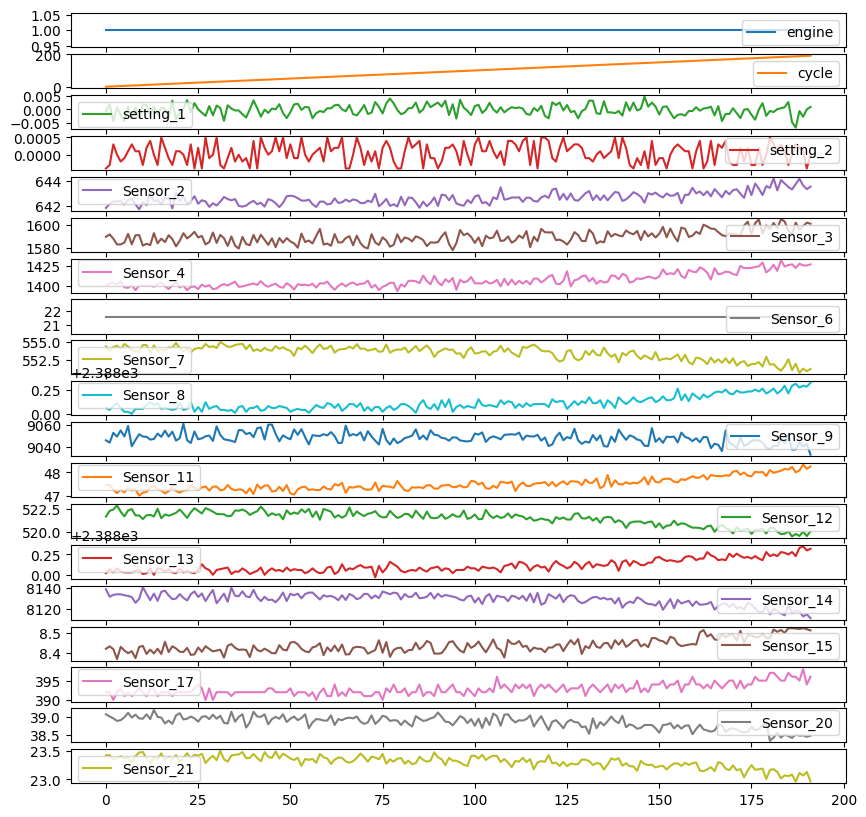

In [8]:
ax1 = train_df[train_df.engine == 1].plot(subplots=True, sharex=True, figsize=(10,10))

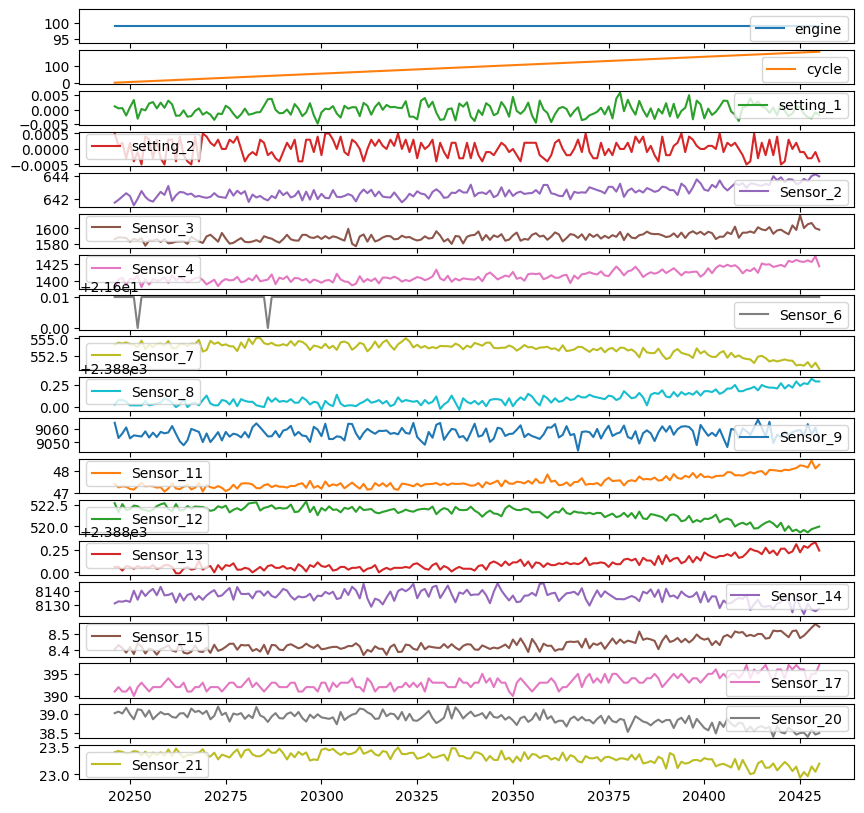

In [9]:
ax1 = train_df[train_df.engine == 99].plot(subplots=True, sharex=True, figsize=(10,10))

In [10]:
train_df.groupby('engine')['cycle'].max().describe()

count    100.000000
mean     206.310000
std       46.342749
min      128.000000
25%      177.000000
50%      199.000000
75%      229.250000
max      362.000000
Name: cycle, dtype: float64

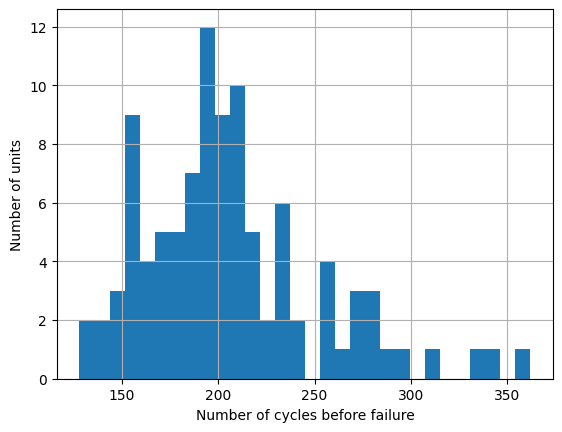

In [11]:
fig, ax = plt.subplots()
train_df.groupby('engine')['cycle'].max().hist(ax=ax, bins=30);
ax.set_xlabel("Number of cycles before failure");
ax.set_ylabel("Number of units");

In [12]:
def add_rul(data):
    df = data.copy()
    max_cycles = df.groupby('engine')['cycle'].max().reset_index()
    max_cycles = pd.DataFrame(max_cycles)
    max_cycles.columns = ['engine','max_cycles']
    df = df.merge(max_cycles, on=['engine'], how='left')
    df['RUL'] = df['max_cycles'] - df['cycle']
    df.drop(columns=['max_cycles'],inplace = True)

    return df

train_df = add_rul(train_df)

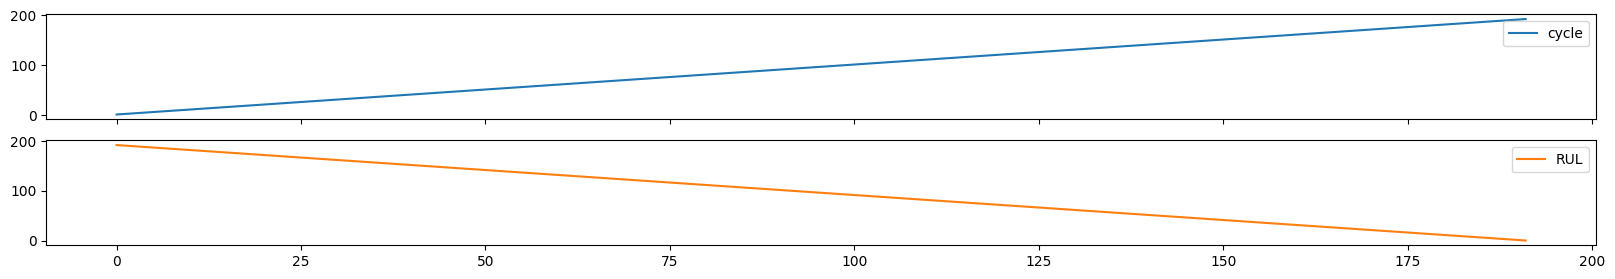

In [13]:
ax1 = train_df[train_df.engine == 1][['cycle', "RUL"]].plot(subplots=True, sharex=True, figsize=(20,3))

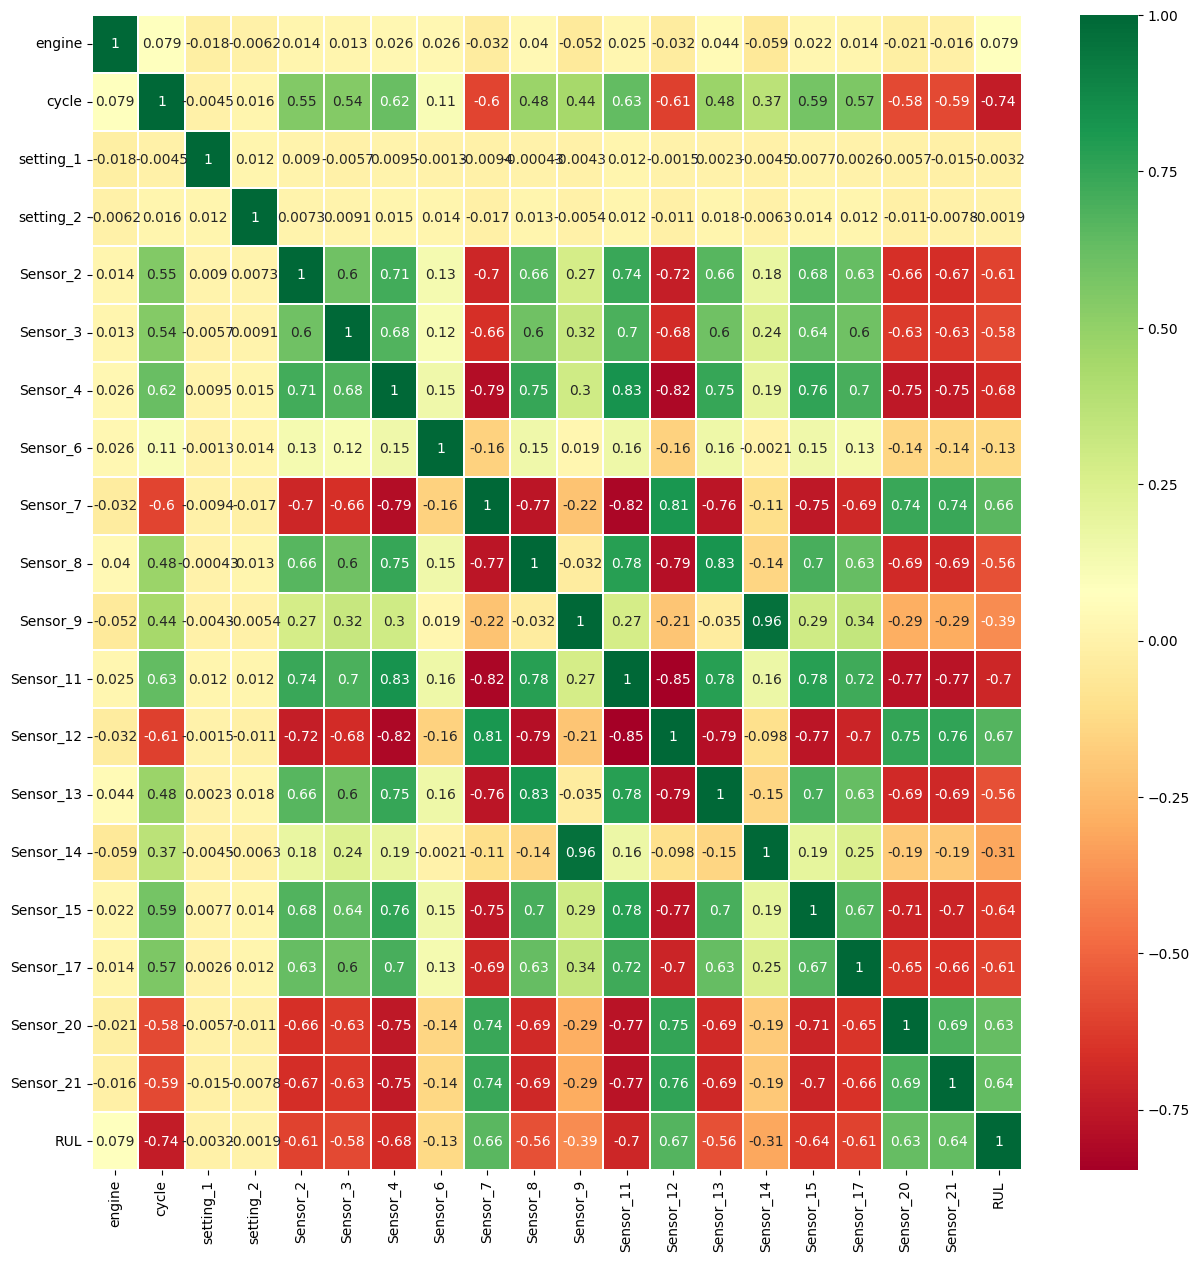

In [14]:
fig, ax = plt.subplots(figsize=(15, 15))
sns.heatmap(train_df.corr(), ax=ax, annot=True,cmap='RdYlGn',linewidths=0.2);

In [15]:
train_df = train_df.drop(columns = ['setting_1','setting_2','Sensor_14'])

In [16]:
data_cols = train_df.drop(['engine','cycle', "RUL"], axis=1).columns # These are the independent variables we want to use.

data_cols

Index(['Sensor_2', 'Sensor_3', 'Sensor_4', 'Sensor_6', 'Sensor_7', 'Sensor_8',
       'Sensor_9', 'Sensor_11', 'Sensor_12', 'Sensor_13', 'Sensor_15',
       'Sensor_17', 'Sensor_20', 'Sensor_21'],
      dtype='object')

In [17]:
def prepare_train_data(df):
    data_list = []
    target_list = []
    for unit_number in df.engine.unique():
        unit = df[df.engine == unit_number]
        data_list.append(np.array(unit[data_cols])[:127,:])
        target_list.append(np.array(unit["RUL"])[127])
    return (np.stack(data_list), np.array(target_list).T)


In [18]:
train_x, train_y = prepare_train_data(train_df)

train_ds = tf.data.Dataset.from_tensor_slices((train_x, train_y))

train_batch = next(iter(train_ds.batch(2)))

train_batch

(<tf.Tensor: shape=(2, 127, 14), dtype=float64, numpy=
 array([[[ 641.82  , 1589.7   , 1400.6   , ...,  392.    ,   39.06  ,
            23.419 ],
         [ 642.15  , 1591.82  , 1403.14  , ...,  392.    ,   39.    ,
            23.4236],
         [ 642.35  , 1587.99  , 1404.2   , ...,  390.    ,   38.95  ,
            23.3442],
         ...,
         [ 642.96  , 1585.47  , 1406.42  , ...,  394.    ,   38.68  ,
            23.3039],
         [ 642.49  , 1582.64  , 1418.5   , ...,  392.    ,   38.85  ,
            23.2289],
         [ 642.99  , 1586.9   , 1399.49  , ...,  393.    ,   38.91  ,
            23.2772]],
 
        [[ 641.89  , 1583.84  , 1391.28  , ...,  391.    ,   38.94  ,
            23.4585],
         [ 641.82  , 1587.05  , 1393.13  , ...,  392.    ,   39.06  ,
            23.4085],
         [ 641.55  , 1588.32  , 1398.96  , ...,  391.    ,   39.11  ,
            23.425 ],
         ...,
         [ 642.71  , 1586.32  , 1397.94  , ...,  391.    ,   39.09  ,
            23.3

In [25]:
model = tf.keras.models.Sequential()

norm = tf.keras.layers.experimental.preprocessing.Normalization()
norm.adapt(train_x)
model.add(norm)

model.add(tf.keras.layers.LSTM(32, dropout=0.1))

model.add(tf.keras.layers.Dense(1))

model.add(tf.keras.layers.Lambda(lambda x: x * 206))

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=3e-4), loss="mse", metrics=[tf.keras.metrics.RootMeanSquaredError()])

In [26]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_1 (Normaliza  (None, None, 14)          29        
 tion)                                                           
                                                                 
 lstm_1 (LSTM)               (None, 32)                6016      
                                                                 
 dense_1 (Dense)             (None, 1)                 33        
                                                                 
 lambda_1 (Lambda)           (None, 1)                 0         
                                                                 
Total params: 6078 (23.75 KB)
Trainable params: 6049 (23.63 KB)
Non-trainable params: 29 (120.00 Byte)
_________________________________________________________________


In [27]:
model(train_batch[0])

<tf.Tensor: shape=(2, 1), dtype=float32, numpy=
array([[ 60.287037],
       [-22.658594]], dtype=float32)>

In [29]:
history = model.fit(train_ds.batch(10).shuffle(10), epochs=490, verbose=1)

Epoch 1/490
10/10 [==============================] - 0s 17ms/step - loss: 1184.2172 - root_mean_squared_error: 34.4125
Epoch 2/490
10/10 [==============================] - 0s 11ms/step - loss: 1233.7571 - root_mean_squared_error: 35.1249
Epoch 3/490
10/10 [==============================] - 0s 7ms/step - loss: 1220.5398 - root_mean_squared_error: 34.9362
Epoch 4/490
10/10 [==============================] - 0s 7ms/step - loss: 1067.9871 - root_mean_squared_error: 32.6801
Epoch 5/490
10/10 [==============================] - 0s 8ms/step - loss: 1146.4004 - root_mean_squared_error: 33.8585
Epoch 6/490
10/10 [==============================] - 0s 8ms/step - loss: 1099.8328 - root_mean_squared_error: 33.1637
Epoch 7/490
10/10 [==============================] - 0s 7ms/step - loss: 1126.7946 - root_mean_squared_error: 33.5678
Epoch 8/490
10/10 [==============================] - 0s 8ms/step - loss: 1021.5506 - root_mean_squared_error: 31.9617
Epoch 9/490
10/10 [==============================] - 0

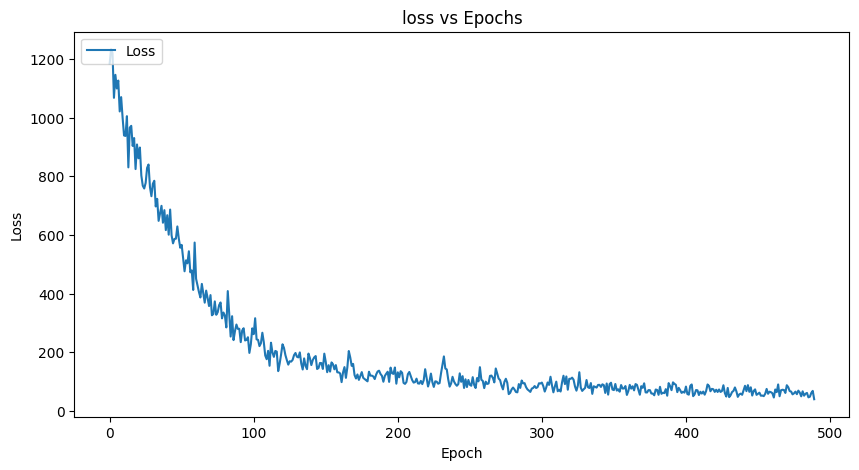

In [30]:
fig, ax1 = plt.subplots(figsize= (10, 5))
plt.plot(history.history["loss"])
plt.title("loss vs Epochs")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend(["Loss"], loc = "upper left")
plt.show()

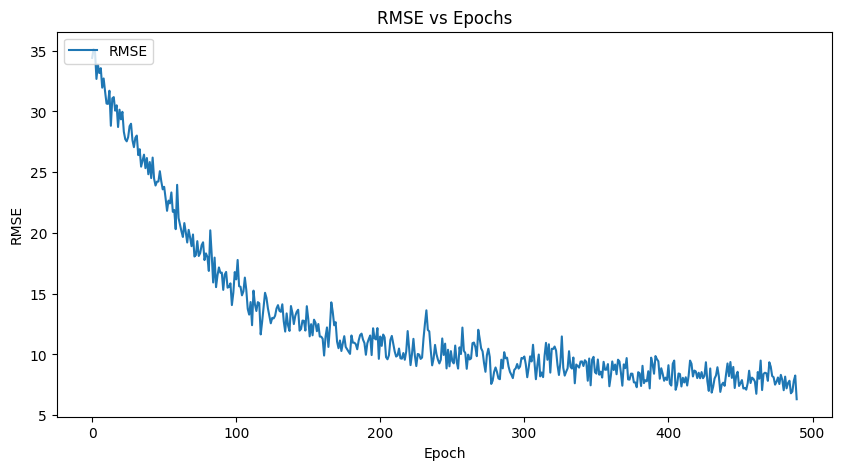

In [31]:
fig, ax1 = plt.subplots(figsize= (10, 5))
plt.plot(history.history["root_mean_squared_error"])
plt.title("RMSE vs Epochs")
plt.ylabel("RMSE")
plt.xlabel("Epoch")
plt.legend(["RMSE"], loc = "upper left")
plt.show()


4/4 [==============================] - 0s 5ms/step


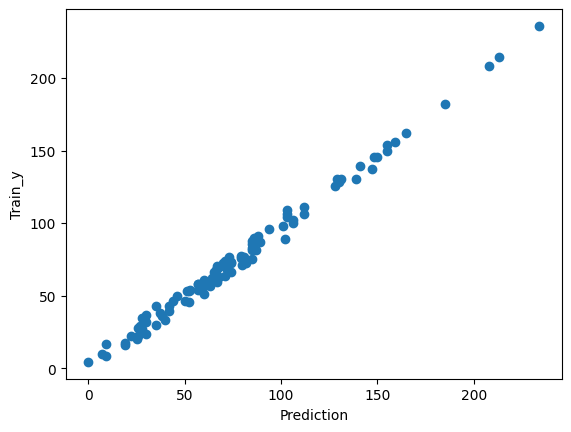

In [33]:
plt.scatter(train_y, model.predict(train_x))
plt.ylabel("Train_y")
plt.xlabel("Prediction")
plt.show()

In [35]:
test_df.groupby('engine')['cycle'].max().describe()


count    100.000000
mean     130.960000
std       53.593479
min       31.000000
25%       88.750000
50%      133.500000
75%      164.250000
max      303.000000
Name: cycle, dtype: float64

In [36]:
test_predictions = []
for unit_number in test_df.engine.unique():
    unit = test_df[test_df.engine == unit_number]
    ts = np.expand_dims(np.array(unit[data_cols]), axis=0)
    test_predictions.append(model.predict(ts)[0,0])
test_predictions = np.array(test_predictions)

1/1 [==============================] - 0s 19ms/step


In [37]:
test_rul = pd.read_csv("/content/RUL_FD001.txt",sep=" ",header=None)

test_rul.describe()

,0,1
count,100.00000,0.0
mean,75.52000,NaN
std,41.76497,NaN
min,7.00000,NaN
25%,32.75000,NaN
50%,86.00000,NaN
75%,112.25000,NaN
max,145.00000,NaN


In [38]:
test_rul = np.array(test_rul.drop([1], axis=1)).squeeze()

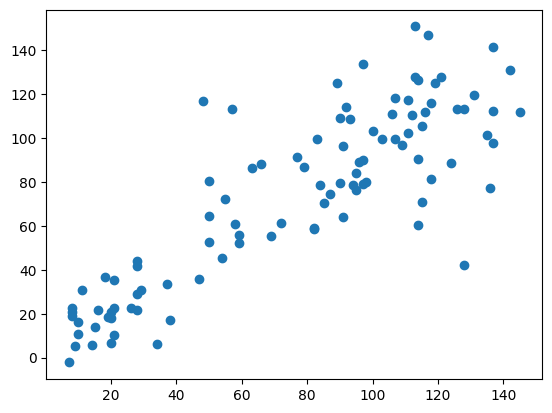

In [39]:
plt.scatter(test_rul, test_predictions)

In [40]:
sklearn.metrics.r2_score(test_rul, test_predictions)

0.7107009784355738

RMSE Value

In [41]:
float(tf.keras.metrics.RootMeanSquaredError()(test_rul, test_predictions))

22.3513240814209

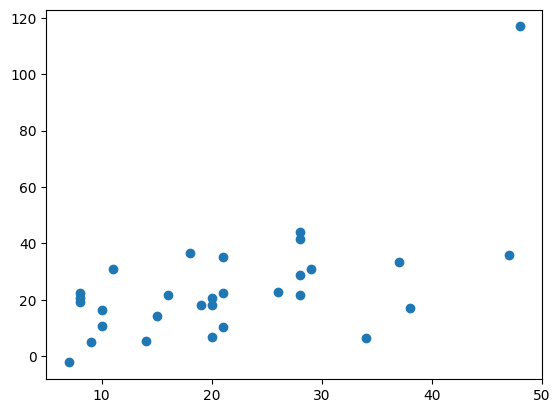

In [42]:
plt.scatter(test_rul[test_rul < 50], test_predictions[test_rul < 50])

In [43]:
sklearn.metrics.r2_score(test_rul[test_rul < 50], test_predictions[test_rul < 50])

-1.311359047684602

In [44]:
model.save('JET_RUL.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [49]:
model.save('JET_RUL.keras')

In [50]:
model.save_weights('JET_RUL_weights.h5')